In [2]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
import copy
%matplotlib inline

In [3]:
max_cars = 20
class JacksCars:
    def __init__(self):
        self.states = [[i, j] for i in range(max_cars+1) for j in range(max_cars+1)]
        self.actions = [i for i in range(-5, 6)]
        self.probs = {}
        for _lambda in [2, 3, 4]:
            probs = [poisson.pmf(mu=_lambda, k=k) for k in range(max_cars)]
            probs.append(1-sum(probs))
            self.probs[_lambda] = probs
        self.gamma = .9
        self.V = [[0 for _ in range(max_cars+1)] for _ in range(max_cars+1)]
        self.pi = [[0 for _ in range(max_cars+1)] for _ in range(max_cars+1)]
        self.transitions = [[[{} for _ in self.actions] for _ in range(max_cars+1)] for _ in range(max_cars+1)]
        for state in self.states:
            for a in self.actions:
                l0 = state[0]
                l1 = state[1]
                nl0 = l0 - a
                nl1 = l1 + a
                if nl0 > max_cars:
                    nl0 = max_cars
                if nl1 > max_cars:
                    nl1 = max_cars
                for i in range(nl0+1):
                    for j in range(nl1+1):
                        for k in range(max_cars-(nl0-i)+1):
                            for l in range(max_cars-(nl1-j)+1):
                                r = (i+j)*10 - abs(a)*2
                                if i == nl0:
                                    p_i = sum(self.probs[3][i:])
                                else:
                                    p_i = self.probs[3][i]
                                if j == nl1:
                                    p_j = sum(self.probs[4][j:])
                                else:
                                    p_j = self.probs[4][j]
                                if k == max_cars - (nl0-i):
                                    p_k = sum(self.probs[3][k:])
                                else:
                                    p_k = self.probs[3][k]
                                if l == max_cars - (nl1-j):
                                    p_l = sum(self.probs[2][l:])
                                else:
                                    p_l = self.probs[2][l]
                                p = p_i*p_j*p_k*p_l
                                if (a>0 and a>l0) or (a<0 and abs(a)>l1):
                                    p=0
                                try:
                                    self.transitions[l0][l1][a-min(self.actions)][tuple([nl0-i+k, nl1-j+l, r])] += p
                                except:
                                    self.transitions[l0][l1][a-min(self.actions)][tuple([nl0-i+k, nl1-j+l, r])] = p
                                

In [4]:
a = JacksCars()

In [5]:
def policy_eval(prob):
    delta = np.inf
    theta = 1/100000000
    while delta > theta:
        delta = 0
        for s in prob.states:
            old = prob.V[s[0]][s[1]]
            val = 0
            for a in prob.actions:
                if prob.pi[s[0]][s[1]] == a:
                    transitions = prob.transitions[s[0]][s[1]][a-min(prob.actions)]
                    for transition in transitions:
                        s_ = transition[:-1]
                        r = transition[-1]
                        p = transitions[transition]
                        val += p*(r+prob.gamma*prob.V[s_[0]][s_[1]])
            prob.V[s[0]][s[1]] = val
        if delta == np.inf or abs(old - prob.V[s[0]][s[1]]) > delta:
            delta = abs(old - prob.V[s[0]][s[1]])

def policy_improve(prob):
    policy_stable = True
    for s in prob.states:
        max_val = -np.inf
        old_action = prob.pi[s[0]][s[1]]
        for a in prob.actions:
            val = 0
            transitions = prob.transitions[s[0]][s[1]][a-min(prob.actions)]
            for transition in transitions:
                s_ = transition[:-1]
                r = transition[-1]
                p = transitions[transition]
                val += p*(r+prob.gamma*prob.V[s_[0]][s_[1]])
            if val > max_val:
                max_val = val
                best_action = a
        prob.pi[s[0]][s[1]] = best_action
        if prob.pi[s[0]][s[1]] != old_action:
            policy_stable = False
    return policy_stable

def policy_iteration(prob):
    complete = False
    cur_iter = 0
    while not complete:
        print(cur_iter)
        print(prob.pi)
        policy_eval(prob)
        complete = policy_improve(prob)
        cur_iter += 1


In [6]:
policy_iteration(a)

0
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 

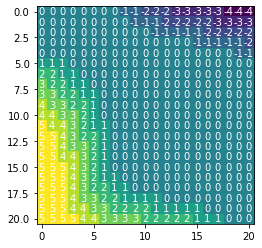

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d


import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2


fig, ax = plt.subplots()
im = ax.imshow(a.pi)
for i in range(len(a.V)):
    for j in range(len(a.V)):
        text = ax.text(j, i, a.pi[i][j],
                       ha="center", va="center", color="w")


In [8]:
# $10 if car is available, $2 to move. Car available day after returned. 
# lambda = [3, 4] for requests
# lambda = [3, 2] for returns
# 20 cars in a lot max
# only 5 can be moved
# gamma = .9

max_cars = 20
class JacksCarsNonLin:
    def __init__(self):
        self.states = [[i, j] for i in range(max_cars+1) for j in range(max_cars+1)]
        self.actions = [i for i in range(-5, 6)]
        self.probs = {}
        for _lambda in [2, 3, 4]:
            probs = [poisson.pmf(mu=_lambda, k=k) for k in range(max_cars)]
            probs.append(1-sum(probs))
            self.probs[_lambda] = probs
        self.gamma = .9
        self.V = np.array([[0 for _ in range(max_cars+1)] for _ in range(max_cars+1)])
        self.pi = np.array([[0 for _ in range(max_cars+1)] for _ in range(max_cars+1)])
        self.transitions = np.array([[[{} for _ in self.actions] for _ in range(max_cars+1)] for _ in range(max_cars+1)])
        for state in self.states:
            for a in self.actions:
                l0 = state[0]
                l1 = state[1]
                nl0 = l0 - a
                nl1 = l1 + a
                if nl0 > max_cars:
                    nl0 = max_cars
                if nl1 > max_cars:
                    nl1 = max_cars
                for i in range(nl0+1):
                    for j in range(nl1+1):
                        for k in range(max_cars-(nl0-i)+1):
                            for l in range(max_cars-(nl1-j)+1):
                                r = (i+j)*10 - abs(a)*2
                                if a > 0:
                                    r += 2
                                if i == nl0:
                                    p_i = sum(self.probs[3][i:])
                                else:
                                    p_i = self.probs[3][i]
                                if j == nl1:
                                    p_j = sum(self.probs[4][j:])
                                else:
                                    p_j = self.probs[4][j]
                                if k == max_cars - (nl0-i):
                                    p_k = sum(self.probs[3][k:])
                                else:
                                    p_k = self.probs[3][k]
                                if l == max_cars - (nl1-j):
                                    p_l = sum(self.probs[2][l:])
                                else:
                                    p_l = self.probs[2][l]
                                p = p_i*p_j*p_k*p_l
                                if (a>0 and a>l0) or (a<0 and abs(a)>l1):
                                    p=0
                                if nl0-i+k > 10:
                                    r -= 4
                                if nl1-j+l > 10:
                                    r-= 4
                                try:
                                    self.transitions[l0][l1][a-min(self.actions)][tuple([nl0-i+k, nl1-j+l, r])] += p
                                except:
                                    self.transitions[l0][l1][a-min(self.actions)][tuple([nl0-i+k, nl1-j+l, r])] = p
                                

In [9]:
b = JacksCarsNonLin()
policy_iteration(b)

0
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
1
[[ 0  0  0  0  0  0  0  0 -1 -1 -2 -2 -2 -3 -3 -3 

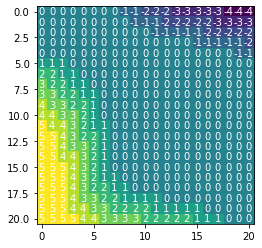

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2


fig, ax = plt.subplots()
im = ax.imshow(a.pi)
for i in range(len(a.V)):
    for j in range(len(a.V)):
        text = ax.text(j, i, a.pi[i][j],
                       ha="center", va="center", color="w")



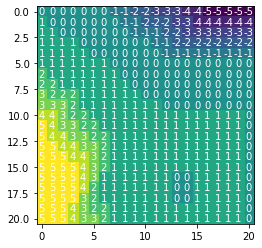

In [11]:
fig, ax = plt.subplots()
im = ax.imshow(b.pi)
for i in range(len(a.V)):
    for j in range(len(a.V)):
        text = ax.text(j, i, b.pi[i][j],
                       ha="center", va="center", color="w")



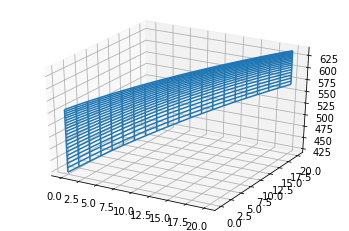

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)


# plt.show()

# plt.plot_wireframe([i for i in range(21), j for j in range(21), Z, *args, **kwargs)

X = np.array([[i for i in range(21)] for j in range(21)])
Y = np.array([[i for i in range(21)] for j in range(21)])
Z = np.array([a.V[x] for x in range(21)])
ax.plot_wireframe(X, Y, Z)

# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# # sphinx_gallery_thumbnail_number = 2


# fig, ax = plt.subplots()
# im = ax.imshow(a.pi)
# for i in range(len(a.V)):
#     for j in range(len(a.V)):
#         text = ax.text(j, i, a.V[i][j],
#                        ha="center", va="center", color="w")


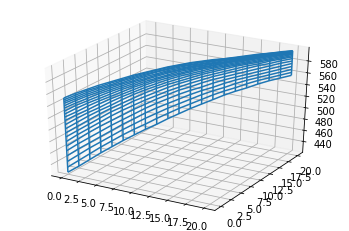

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)


# plt.show()

# plt.plot_wireframe([i for i in range(21), j for j in range(21), Z, *args, **kwargs)

X = np.array([[i for i in range(21)] for j in range(21)])
Y = np.array([[i for i in range(21)] for j in range(21)])
Z = np.array([b.V[x] for x in range(21)])
ax.plot_wireframe(X, Y, Z)

# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# # sphinx_gallery_thumbnail_number = 2


# fig, ax = plt.subplots()
# im = ax.imshow(a.pi)
# for i in range(len(a.V)):
#     for j in range(len(a.V)):
#         text = ax.text(j, i, a.V[i][j],
#                        ha="center", va="center", color="w")
